**Task 3:**

To make the above design of the engagement metric useful to the business, ParTech needs to know which customers are likely to be unengaged in the future. They also need to understand the early warnings/drivers of unengagement so that action can be taken accordingly.

To achieve this, Data Scientists need to predict and classify engaged/unengaged customers using Statistical/Machine Learning techniques, based on the following sub-tasks.

In [ ]:
from google.colab import drive 
#get drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
mmd_df=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/marketing_monthly_data.csv')
tdd_df=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/transaction_details_data.csv')
tmd_df=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/transaction_monthly_data.csv')
cluster_df=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/cluster_data.csv')
feat_eng_df=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/engaged.csv')

***Sub-tasks - Part A - [Model Data Preparation using Jupyter Notebook | Python3]***
1. How can the dataset(s) be joined efficiently to create a single dataframe, containing 1 record per customer per yearmonth? (Note: avoid replication of effort in case of overlap of information across any dataset(s))
2. Assume that at any point in time, ParTech needs 1-month heads-up to implement any action (i.e., the gap between feature window and target window needs to be 1-month). Based on this assumption, create a binary engagement target using the engagement metric definition from Task-2)

![Task3.jpg](,Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoL6+ttNtXuby4itbdPvTTuERecck8Cp680+KWl3EnjLwPrNzp1xq/hzTJrs31rbW7XLRTSRBYLgwqCzhP3i/KrEeaGxgEgA7+PWbCa5trdL62e4uoWuIIlmUvLENoMijOWUb0yw4+Yeoq5XyNqHgHxNpviBdZtdG8Tafp81r4il0m10VjHLZyXE1q9pHIEIMYkeOSXY3ypvxJtAYDoNch+KsNzrdtbzaneG4NhPfagkVyn2KMSwrc29vCsirMDGJpFktmSTBKtmTbQB9M0V89af4E8daqNSt28U+IZDD4c3aRqDGewQ3rXd20fmQtIzsyRfZkPmsxZcFxuPGH4m1b4n3uhW2pWugeIoNc1i9/tO3gW9nRNMRJ4IhbNDGCh3QRtKyzFVJkcLuY4oA+lJda0+G4tYJL62jnupWggiaZQ00iqzMiDOWYKrEgcgKT2q7XzMvhDxr4ZtdTtvCVtq8OtN4n128zeTzSWzJNZ3z2T7pWMZQyvb529Gxv5FW7bRfGmreJNEgsJvFtt4Pm1HT/ALcb+7uIrsMLS++2Zdm8xYS/2IfKQm/Jj9aAPo6iuR+Eq63H8PNGj8RG4OrxI8UzXhzMwWRlRnPdigUk985rrqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArkviJ40uvAthBqv9mvdaFarNdaxeoQzWdtFCzlljyGkYsFGFBwNx7AHrahvLWO9s57eaJJ4Zo2jeKQZV1IwVPsRQB5x4m/aI8G+FpryG5upppLWeSBhCq4fy4I55nRmYB1RJo84JJZtqhm4q74g+N3h3wyrTagl9Fp7abcapbX62+6G7hhiWWURYO4sEYMMqA3O0nBxy3w4/Zvs/Cfw78E6VeajcQeItBhn8zUrF0m3yXJD3KZniYPGWCYZkDYjT7vIq3rn7MPhPxB4i1bWby61N7rUbe6tnw8OY0uIFglCv5XmEbVBVWZlU52gDigDS1L4/aDo14tre6XrlvMIrKaZfsBfyFu5pIbUPtY/NJJEV2jJXcpcIM4fN8fPDcenm5WDUp3giu57+2htw0unxWsphuZJgGxhHBGELM+CUDgEjV1r4T6Lr2qXmoXMl2s91/ZnmCORQv8AoFw9xBgbe7ud3qMYx1rEuP2fPD0rX7Qahq1i2oi/jvjbzR/6VBdzmaaF90Zwu5m2ldrqGOG5oALv9oDQA+pxWNnqF/JayXNrBKIQkF3dw2xuWt45Gb7xhBcMRswrDduG2sLQP2jxeavaLrPh+80jTbnQ9J1VpAFmNq17PLCPNZWK7NyxYK5bDlioCtt6uH4H+Grfy1QXSwx6rPq6wiUBBLNZvZsnC52eVI2BnIODntVS3+Aegw6bJZTahql4JNNsNJMs0sQfyLOd5oB8sYGQXKk45AHfJIB2fhO81q+0lp9dsYdNvXuJvLtYnDlIBIwh3kEjeYwpbaSASQK2aKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK8n/ao8Y3ngb4D+KtS092ivWgW1jlU4MfmusZYe4DH8a6MPRliK0KMd5NL7znxFaOGozrS2im/uVzy/4zft6eHvAOtXOi+GdMPii/tmMc90ZvKtUcHBVWAJcj1AA9Ca5XwH/wAFHLK+1SK28XeGDpdnIwU3+nTmYR+7RlQSPoSfY14n+x58BNI+OHjHVW8QSyNpGjwxyy2sL7GuHdmCqW6hflYnHPTmvSP2yP2V/Cnw18FW/i7wlFJpaRXKW11YvM0iOHztdSxJDAgAjOCDnjHP6U8BkdDERyupFuo7e9ru9uv6W7n5hHMM+xGGlmtOSVNX93TZb9P1v2PurR9Ystf0u11LTrmO9sLqNZoLiFtySIRkEGrlfJH/AATp8Y3msfD3xFoFzI0sOj3kcluWOdiTKxKD2DRsf+BGvrevz7McG8BiqmGbvyv8N1+B+i5bjFmGEp4pK3Mvx2f4hRRRXnHpBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcT8avAI+KHwt8R+GgVWe+tSIGbosykPGf++lFdtRWtKpKjUjUhvF3XyMqtONanKlPaSafzPyE+Enxe8S/s/+NLnUNKSMXADWl7p94pMcoDcqwBBBDDgjpz710nx6/an8T/Hmzs9Ov7a10nR7WTzhZWZYiSTBAd2JycAnA4Aya6n9un4UnwH8W212zg2aT4jQ3alRhVuRgTL+JKv/AMDPpXk/wU+G9x8WPiboXhqFW8m5nDXUij/VwL80je3ygge5Ffu9H6hiqUM3lBcyje/a2/3bH4DW+v4SrPJ4zfK5Wt3vt8noz72/YR+Gsvgf4O/2veRmO98RTfbNrDBWBRtiB+o3N9HFfSFQWNjBpljb2drEsNtbxrFFGowEVRgAewAqevxDG4qWNxM8RPeTv/l9yP3XA4WOBw1PDw2irf5v5sKKKK4juCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiufs/HGlXni/UPDIn8vV7NElMEnBkRlDbk9cZwfStI051E3FXsrv0MqlanScVOVuZ2Xm97fgzoKKKKzNQooooAKKKKAMltUmViPl6+lN/tWf/AGfyqtJG3mN8p6+lN8t/7p/KgC2dVn/2fypv9rT/AOz+VVmjf+4fypvlv/cP5VQmW/7Wn/2fyoOrzj+7+VZ3mJ/eX8xQ0if3l/Snyk8xfGsT/wCx+VH9sT46J+VZokT+8v5ijzF2j5l/Sq5Q5jRbWrgdk/Km/wBt3Hon5VQXEnC4Y+i0vkv/AHG/Kiwrl463ceiflTf7dufRPyqm0L/3G/Km+S/9xvyp2Qrsu/29c+kf/fP/ANekbX7odo/++f8A69UfJk/55t/3zTWhk/55t+VNJCuy8fEF1g8R/wDfP/16T/hIbr0j/wC+f/r1QMMmD+7b/vmm+TJ/zzb/AL5q1GJN2X/+Eku/SP8A75/+vTT4mu89I/8Avk/41nmGT/nm3/fNMa3lz/q2/wC+apRiTzSNFvE94O0f/fJ/xpreKL0dov8Avk/41mtby/8APJv++TTWt5f+eT/98mrUIdiOaXc0m8VXo7Rf98//AF6Y3i2+HaL/AL5P+NZrW8vP7p/++TUTW8v/ADyf/vk1ahDsQ5z7mp/wmF/6Q/8AfJ/xpD4xv/SH/vk/41kG1m5/cv8A98mmtazf88X/AO+TV+zp9iPaT7mq3jTUAekP/fB/xpn/AAm+o5+7D/3wf8ax2tZs/wCpk/75NMNpPn/Uyf8AfBq1Tp9iHUqdzZbx1qQ/hg/74P8AjSReONVmmSJFgLuwUDYep/GsNrOf/nhJ/wB8Gn2Ec1pf28zQSFY5FY/Iexq/ZU7bIj2lS+7PPv2sNFf4q+Ab7R4YklvNLb7VbSKvzPMgIZR6BhuXH0NeVfsN+HH8D2t74vvbX99qRNpCJFw6W6t8zL9WH/jlfQPiLT5NN1e4jkX5XYyRtjhlJyDVGzs5b64it7ePfLI21VUV9HRxPJl7wa+CWv8AmfBV4VJZisW/4kdP8jutW8catpt9LAPs7qpBR/LPzKRkHr6GqLfEnVv7tt/37P8AjVLxJbyy6kyRRSSJCiQhwhw21QCfzFY7WNzz/o8v/fBrw6dGi4puKPtJ1qybs2dC3xM1cfw23/fs/wCNMb4n6wB922/79n/Gucaxuf8An2l/74NRNp91j/j2l/79muiOHofyowdev/Mzo2+Kmsj+G1/79n/GmN8VtaX+G1/79n/GuZbT7r/n1m/79mon0+6/59Zv+/ZrZYfD/wAqMXiMR/Mzp2+LWtj+C0/79n/4qom+L2u/3LT/AL9H/wCKrlm027/59Zv+/ZqJtNvP+fSb/v2a1WFw38qMHisT/Mzq2+MWvD+Cz/79H/4qoz8Zdf5+Sz/79H/4quSfTLz/AJ9Jv+/RqJtLvMn/AESf/v0a1WFwv8qMJYvFfzs61vjT4gH8Fn/36b/4qo2+NniFf4LL/v03/wAVXHvpV7/z5z/9+m/wqJ9Jvef9DuP+/TVssHhP5EYyxmL/AJ2di3xw8RL/AMs7H/vy3/xVMb46eIx/yzsf+/Lf/FVxUmk33/Plcf8Afpv8KjbSb7/nyuP+/Tf4VqsHg/5Ec8sdjb/GztG+PHiQf8s7H/vy3/xVRt8fPEy/8s7D/vy3/wAVXENo9/8A8+Nx/wB+W/wqF9Hv8f8AHjcf9+W/wrVYLBfyIwlj8d/PI7lvj94nH/LOw/78t/8AFUxv2gvFCn/V6f8A9+W/+KrhH0bUP+fC5/78t/hUMmi6hn/jwuf+/Lf4VqsDgf5ImEswx/8Az8kd437Q3in/AJ56f/34b/4qmN+0T4qX/lnp/wD34b/4quAbRdRz/wAeFz/35b/CoJtHv41BaxuFHvCw/pW0cBgf+fcTnlmWYf8APyR6E37Rvisf8s9O/wC/Df8AxVRt+0h4sX/llp3/AH4b/wCLrzltMvP+fSb/AL9mon0u8/59J/8Av0a2WXYH/n3E5ZZpmP8Az9kekN+0n4tUD91pv/fhv/i6jb9pbxcP+WWm/wDfhv8A4uvNn0u9wP8AQ5/+/TVE2l3v/PnP/wB+m/wrVZbgP+fcTnlm2Z/8/ZHpbftMeLh/yy03/wAB2/8Ai6Y37Tni8f8ALLTP/Adv/i681/sPUZFyun3TD1ELH+lMbQdT/wCgdd/9+G/wrRZbl3/PuJzyzbNelWR6Uf2n/GH/ADy0z/wHb/4uo2/ai8Y7seVpf/gO3/xdeaN4f1T/AKBt3/34b/Com8P6puP/ABLbv/wHb/CtFluW/wDPuJzyzjNv+f0z01v2pvGQz+60v/wHb/4uo/8AhqjxnjPlaX/4Dt/8XXmLeH9U5/4ll5/4Dt/hUZ8PartP/EsvP/Ad/wDCtFlmW/8APqJzSznOP+f0/wAT1Bv2q/Gi/wDLLS//AAHb/wCLqM/tXeNc48rSv/AZv/i68vk8O6r/ANAy8/8AAd/8Kibw7qu7/kF3n/gO/wDhWiyvLP8An1E5ZZ3nX/P6f4nqbftYeNR/yx0r/wABn/8Ai6jP7Wnjb/njpP8A4DP/APF15Y3hzVv+gXef+A7/AOFQt4b1b/oF3n/gO/8AhWqyrK/+fUTllnmd9K8/xPVj+1t43/546T/4DP8A/F15x4k+JmueIvGy+K3nSy1lPLKS2YKBSi4GASew59azG8N6t/0C7z/wHf8AwrLvLWaymaK4hkglGCUkQqw/A134bL8DRk3QpxTas7djxMdm2aYmCjiasmk01e+jWz9T7j+B/wAcLL4paaLS6Mdp4it0/f2+cCYD/lont6jt9K9Vr5b/AGafgLdR3ln4y10S2gj/AHmn2gJRmyOJH77cdF79+Ov1JX4zndHCYfGyhg5Xj17J9Un1/pH9H8MYnMMXlsKuZRtPo+sl0bXRv8d+oUUUV4J9YFFFFAFXTdSttYsYbyzlE9tMMpIARkZx3q1XnvhfVNS8I6PHpE3hvVLo2skiLNbrGY3XexUglx2IrW/4Ti9/6FPWv++Iv/i67amFkptQs101W33nl0cfCVOLq3UrK65ZaPr0Osprfdb6Vyv/AAnF7/0Ketf98Rf/ABdH/CcXv/Qp61/3xF/8XUfVqnl96/zNfr1Du/8AwGX+RhfZZ/8AnjJ/3waRreVFLNFIo9Sprd/4Ta8/6FLWv++Iv/i6pa14yu5dNmU+FtYiBH3mSLA/8fr04yqtpcq+9HnyqYdJvmf/AIDL/Iy6KxP+EkuP+gHqP/fKf/FUf8JJcf8AQD1H/vlP/iq7vZT/AKaOL63R7v7n/kdr4T/5C3/bNv6V2leVeG/FV1b6jvXw9qkx2EbY1jz29Xrqf+E4vf8AoU9a/wC+Iv8A4uvJxWHqOpdW+9f5np4fG0VDVv8A8Bl/kdZRXJ/8Jxe/9CnrX/fEX/xdH/CcXv8A0Ketf98Rf/F1yfVqnl96/wAzq+vUO7/8Bl/kdZRXJ/8ACcXv/Qp61/3xF/8AF0f8Jxe/9CnrX/fEX/xdH1ap5fev8w+vUO7/APAZf5HWUVxLfE9V1BdObw/q41Jl8xbXy49xTn5s78Y49atf8Jxe/wDQp61/3xF/8XTeFqrdfiv8yVmGGlflk3byf+R1lFcn/wAJxe/9CnrX/fEX/wAXR/wnF7/0Ketf98Rf/F0vq1Ty+9f5lfXqHd/+Ay/yOsork/8AhOL3/oU9a/74i/8Ai6P+E4vf+hT1r/viL/4uj6tU8vvX+YfXqHd/+Ay/yOsork/+E4vf+hT1r/viL/4uj/hOL3/oU9a/74i/+Lo+rVPL71/mH16h3f8A4DL/ACOsork/+E4vf+hT1r/viL/4uj/hOL3/AKFPWv8AviL/AOLo+rVPL71/mH16h3f/AIDL/I6yiuT/AOE4vf8AoU9a/wC+Iv8A4uj/AITi9/6FPWv++Iv/AIuj6tU8vvX+YfXqHd/+Ay/yOsork/8AhOL3/oU9a/74i/8Ai6P+E4vf+hT1r/viL/4uj6tU8vvX+YfXqHd/+Ay/yNnX4dM/s2a41WONrW3UyO7rnYB1PHP5VQ8NT+HpNQ1K00fyTd2DRpdKindGXQOoJPXKkHisHxPruqeJNBvdLt/DGqwS3aeSJJ1jCKCQCSQ54xmueZfEvw5+I3ii90/wle+JdM1qKzljmsbiFPKkiiMTqwkYHoEIxTqRlSppN7t6X9OxxvExlXU4wvFWu+V315vK/Rfeew0V5l/wtLxZ/wBEt1z/AMDLX/45R/wtLxZ/0S3XP/Ay1/8Ajlcdzu+uUvP/AMBl/kem0V5fN8WPFNvDJLJ8LtdWONSzEXdqcADJ48yqHh749an4y0uPVfD/AMPNc1PSZiwhuvPtot+0lW+VpMjkEfhRcn69Qvy3d/8ADL/I9forzL/haXiz/oluuf8AgZa//HKP+FpeLP8Aoluuf+Blr/8AHKLlfXKXn/4DL/I7zxB4g0/wro9xqmqXK2lhb7fMmYEhcsFHAGepA/GmeH/Elj4mt7qawkaRLW6ls5dylcSRttcc+4615J4+1bxh8TvDb+GV+H2p6RHf3Fus17d3duY4olmR3YhXJPCnoK1NF/4TL4f6l4js7HwY+v6dearNqFteQ6nbwDbKFJUq5zkNuoLpVvbTkkvdSW6a11vv8j1uivOv+E78d/8ARMbj/wAHdp/8VR/wnfjv/omNx/4O7T/4qmdR6LRXnX/Cd+O/+iY3H/g7tP8A4qj/AITvx3/0TG4/8Hdp/wDFUAei0V51/wAJ347/AOiY3H/g7tP/AIqj/hO/Hf8A0TG4/wDB3af/ABVAHotFedf8J347/wCiY3H/AIO7T/4qj/hO/Hf/AETG4/8AB3af/FUAei0V51/wnfjv/omNx/4O7T/4qj/hO/Hf/RMbj/wd2n/xVAHotYniyNpNPQIrOd44UZ7GuV/4Tvx3/wBExuP/AAd2n/xVH/CdeOz1+GNx/wCDu0/+Kq4S5JKXYiUeaLiR/ZZ/+eMn/fBpjxvG2HVkPXDDFTf8Jz46/wCiYXH/AIOrT/4quI8a/FjXNP8AEOm6bqPgW7stTv4yLO3XUIJRLtJLZdThcD1r06eK5pWasefPDcsbpnX0VxX/AAl3i7/oQ5//AAa23+NH/CXeLv8AoQ5//Brbf412c68/uZy8j/po9p8J/wDIJ/7aN/StqvJvDfjbxvFpu2L4b3E6bz8w1m1X07E1qf8ACd+O/wDomNx/4O7T/wCKrwq2tSR7FP4Eei0V51/wnfjv/omNx/4O7T/4qj/hO/Hf/RMbj/wd2n/xVZGp6LRXnX/Cd+O/+iY3H/g7tP8A4qj/AITvx3/0TG4/8Hdp/wDFUAei0V51/wAJ347/AOiY3H/g7tP/AIqj/hO/Hf8A0TG4/wDB3af/ABVAHotFedf8J347/wCiY3H/AIO7T/4qj/hO/Hf/AETG4/8AB3af/FUAei15DrPwWsda+K2p+NfEOybS7WGJrezxuDskY3O49AQcL3I5467P/Cd+O/8AomNx/wCDu0/+Kqjrniz4garomoWUPw2ngmubeSFJW1q0IRmUgMRu5AJrrw+KrYVydF2clb5O3+RwYzA4fHqEcRHmUZKSXS6va/fc9D8P61aeJNDsNVsGZ7K8hSeFmUqSjDI47cGtCsXwTob+GfB+iaTIQZLGzht2K9NyoAcfiK2q5DvCiiigAooqrfalBp8e6Z8ei9zTScnZCbSV2WqK5G98XTSEi3QRr/ebk1ly6veTHLXD/QHFdkcJOW+hyyxMFtqeg0tecfbrj/ntJ/30asQ65e25ytwx9m5q3g5dGQsVHqjv6zfEP/IIuPpWdpvixZGEd0uwn/lovStDXmD6NOynIK5BFc6pyp1IqS6m7nGcG4nCUUUV7p4xteE/+Qt/2zb+lbfjLxVZ+B/Cuq+INQWZ7LTbd7mZbdQ0hVRkhQSAT9SKxPCf/IW/7Zt/SrnxQ8Gn4ifD3xD4ZE6Wp1WzktPOkTeqbhjJXIyK8bF/xD1cN/DJJPH2laXbWb+IZofCdzeSGK3s9avLaOWVgQPl2SsrcsvAYnkcc1n+LPjJ4M8G6Xrt7f8AiHT2/sSLzr+1guo3ngXdtG6PdkZbjnHPFct42/Z/sPEGuafdaelvbaWmnT6VdaO01zBbyRSypIWxBIm45Ugo2QwI6Y54Lx98HfFOv+KfEM+peK4rpLrStR0y0DQNiKO5nhmi+TcFAjWFIztGXxuJya54U5VHaJ0TmoK8j6At/Gnh66jV4dd02ZGmS2DJdxkGV4xKkfB+80ZDhepUg9KoQ/FTwXcwWU0Pi7QpYb6Qw2sialCVuHBUFYzu+Y5kQYHd19RXi+p+B/E2qeKzqZ1XToLS41q2166hFu7SGeOy+yGNG3ABCFR8kZyCMc5GavwbuY7XwrbyXkF7a6Z4fh8P3lpJLc28E8cbKwkCQyqGyQ2UfIOV5GDnf6rU7GP1ime3atd6VpXxB/tS/wBX02xS10xYpo7m6SOSPzZwkTMCeFdgyKT1bgZNWb74neHdM1a4tbvV9OtrW1iZ7m+m1G2SKCRZUi8p1Mm9W3SIMlduSATkgHyX4vfD26+KmrafO+oR2VmLO4sNQtxDk3MbFJICDnhop40cHnqw75rAk+Deq39npiXOtWsl6qRvfTi2OLi4OqwahM4G7gM0TKAc4DDrirnQrStforGNOpRp83L9p3+Z7j4m+Mng3wv4Pn8S3PiPS5dMWKeSB4r6E/amhDF44iWAdwVIwDweDiri/E7wpG0cV14i0uwvDai8ezur6KOaKLy/NLOhbIAT5iegAz05rzLxF+z3quo3HiO607W7GObXINXspFvbRpI4Yb/yCWVQwy6NB04DBj0xzoWPwEuYruKzu9TtrrQBrCa5InkMLl5Rai3MJbO3yzgnOM7Tsx/FXCd56d/wl+hG4aAa1p5nWaK3aP7VHuEsq7okIz951IZR1YHIzWvXhHw2/ZtvPBPiTw/ql/4hTVjYRj7WDblWu5YI5LeykJ3EApbysrf3mCkYxivUtb8QXWn6g8MWzYoB5HqK0p05VHaJnOapq7Olori/+Esvv+mf/fNH/CWX3/TP/vmuj6rUMfrNM7SiuL/4Sy+/6Z/980+HxVevKiny8FgD8tH1WoH1mmdjRRRXGdQUUVx9x4pvI7iRBswrED5fetqdKVW/KZVKkafxHYVxPhf4yeFPFWm+INQg1OOzsdDvmsLy51BlgjVhtw4ZjgxtuG1u9UfEHiHWtQ0HUbXTbqGx1Ca3kjt7p49whkKkK5GecEg49q8Us/gXqvh2606XR/Fc1zFZ2mmRC21a2idJJNPnMluT5SJwVknVidzElDk7MHX6rUMvrNM9tm+OvhFtV1TTNP1Wz1XUNPtbO9eK3vrdVkiuZWjRkd5FU4KEnkfeQDJYA9BcfEbwna3OpW83ifR4bjTYnnvopL+JWtY0xveUFvkVcjJbAGRmvGfEXg/xB4m1TXLy6v8AT0OtWOl21ysUDjypLK7luFKZblWEzKc4IKg98BL79n+78beE7vQzrttDYwx6wtlILdvP36gzs3n/ADYZU8xhx98hSdu3BznRnTV5I0hVhN2TPbLXxv4b1LRpdUt9f0u60pZRbPexXkbwLIzKojLhtoYs6jGc5YDvXB+A9S0j4N/CW10u51nS9UvNJF1DJHa38EXmzRs0ksYaV0VWRTlg5G3GTitTUPhGuqaT8SdPnvgsPi45R448NaH7FFbhhk8sGiDg8dvSvJb74B3FvY+I7a48QQXt7rGkXEEjpbMI49RuhH9rusbujeTHheoy/JzWcYSm7RQTUIyVWW6TX32/yR9AWvxA8L32q3emW3iTSbjUrQSm4s4r6JpofLIEm9A2V2EgNkcZ5rB0f44eC9am1xofEGmrpukywQSaq19D9kleWPzFVJA+CcdRwa8X8TfBW88UaTqOnza2ttFfX+t3bvDAdyrqEUqbevJTzBn129qs6T8MfFK+Po/F0ms6a2t/2jDdrarbOLUhbNrRlY7i2dr7g3bG3GOa6fqs0rsz+sQbsj6At/HXhu7WIweINLmEssMMZjvY23yTIHhQYblnQhlHVgcjIrS03VLPWLRbqwu4L61ZmRZreQSIWVirAMDjIZSD6EEV4Hdfsr3cS6c2neJI4ZbKwjZTLakr/akM00tvdABuEX7TMuzJO0Rjd8vPtfgnwzF4L8H6NoMD+bHp1pFbeaRgyFVALn3Y5Y+5NcZ1G3RRTZJFiUs7BVHUmgB1FYN94sggJWBTM3r0FYtx4mvpj8riIeiiuqOGqS6WOeWIhHrc7iivPG1a8c5NzJ/31Srq14nIuZPxbNbfU5dzL61HsehUVxVt4qvISN5WYf7Qre07xLbXzBG/cyejdD+NYTw9SGtjWFeE9LmvXOeK/iBo3gqS0TVnvYjdyLFC1vp1zcq8jHCpuijYbieik5PYV0dch8R/C974ot/DyWXl5sdcs9Qm8xtv7qKTc+PU46CuY6Dq7e4W6t4pkDqkih1EiMjAEZ5VgCD7EAipK+Z/iF8E/G3jbxd4rvI7DRrG1v8AR9W0pJrUrC92s5gNsZGUb2IETbixAUn5AQc1zXibwKsnx+e1tNM06xt7K+t4NGW0tCNRs2bTJIhcQqU2izjknd2KkYkQnO4EEA+r9T1ux0aSxS9uUt3vrgWlsHz+9lKswQe+EY/hXnfxO8Lyat488Lasskax6Wk5kRgdzeYpUY+hrzbw/wDs3XWm6F4ekvNCh1C/03VdPu7yyvZLR4Z/JglhllhEcEahmMqsWk+dxGN2Coza/aU+E+ueNPGVndaJNBbW93pghv5HkKOsttI89i64HOJmOfY966cP8exz1/gO5/tGP+1DYeXcecIRP5n2d/J27iuPMxs3ZH3c7sc4xTda1i08O6Pfarfy+RY2MD3M8u0tsjRSzHABJwAeAM14PffAnX9UtYWuobF5r4Wl1qcLTbk886t9uuYwcfMgVmRSeoUDAqr4p+Amt32kavp0Wk6XqdhPba1a6ZYzziOHTmubgSQTINp24XIO0ZXgDgnHsc0ux5fKu59f+C5kuNDjljO6ORiynGMggEVu18xaB8A9S8QSPBqVlZiObVLqe619ZAbi40+Wxa3+w4xuwGdflzsxErD5jgavwy+C3jTT/GWj6v4rns5oiy6pqK29wXB1GCGWzgKqRyr28qOT/C8KjBzmvDrfxJHsU/gR9EUVzmva9c6bfeVFt2bA3zD61nf8JZff9M/++a1jhqkkpIzliIRdmdpRXF/8JZff9M/++aP+Esvv+mf/AHzVfVahP1mmdpRXF/8ACWX3/TP/AL5p8Piq9kmjU+XhmAPHvR9VqB9ZpnY0Ug5ANLXGdQUUVRvtZtdPyJJMt/dXk1Si5OyQm1HVl6iuVuvGLtkW8IUf3nrNm8RX82f320eijFdUcLUlvoc0sTBbaneUV52dUvD/AMvMv/fVFafU5dzP61HsdjrWsJpcHHzTN91f61xNxcy3cpkmcu5p99ePf3TzSHljwPQelV67KNFUl5nLWquo/IKKKkht5LmTZEjO3oorp23MN9iOitmHwreSLltsf1NE3hW9jGV2yfQ1j7ane3Maexqb2MatC31Z49PntJCWjZfk9jVOaCS3kKSoyN6MKjrRxU1qQm4sKKKKok2vCf8AyFv+2bf0rtK4vwn/AMhb/tm39K7SvGxf8Q9XDfwwrynxh41061+IN9okz+RLa2EF9PcysqQxrK7xxKWJ+8xikx/ue4r1avnj4nfBfVfHnxU15UjUabqMGgXyXN1GzQE2V9I88BIUgMUMZUHqWbsCRFCapzuzStBzjZHXw6tY3GnpfxXtvJYyKGS6SVTEwJwCGzggmobDxHpOqzRxWWqWd5LLEZkS3uEdnjDbS4APKhuM9M8Vhah+zvqN98MvEnhdryxdtT1a4vY1cMYRDLe+fsYbeu0kEYIyfxrgvFH7Pd7qF1q0VnfWWl/bNc1K+e5t0IkWK40yWzXoBlxI6uRnGF65r1I1lP4dTzZUnD4tD1VfFmhvYyXq6zp7WccjRPcC6j8tXUFmUtnAIAJI7AVg+IPjN4R8K3GoQ3erwyXmn6aNYltLdg8rWx3YdBnDZCMcA9MHoQa4mH4K6tqHi7Q9d1BdHs1sbvT3k06zZ5ISlrbXkayKWjX94WukwMYVYh8xOKzrj9n/AFyXwrqmhx3OlypqXhqXQXaV5AsLfaJ5IyF8s7k2zBSONu3gNni25W2ISjfc+srfxVostjaXSavYNbXUwtYJhcoUlmyR5anOGfII2jnINReE/Flr4w0+6ubaKWA2t9c6fNDMAHSWCVo2zgkYO3cD3VlPevJ/EPwN1y417UdU0S40+wup9YS+srrz3T7JCbS1gmRoPKaOYOLd8xnb/AQ6np2fwf0e9sLfxdf3ttNZHVvEd9eQ286FHEKssCNg9A4gEg9pBXz57h6BXD+KP+QxL/ur/Ku4rB1bw2+o3zziUKGAGMegrqw04053kc2Ii5wtE4+iuk/4Q5/+e4/Kucr14VI1PhZ5kqcofEhKkt/9fH/vD+dR1Jb/AOvj/wB4fzq3sQtz0qiiivmz3wrze8/4+5/99v516RXNzeEPNmd/tGNzE9PU124apGm3zM5MRTlUS5TlaK377wm9rbPKkwfYNxXFYFepCpGorxZ5soShpJHKa78S9F8N6lq9tqUr20Ok2EOoXl0y5jjWaR44kAGWZ3aN8KoJPA6kA9r8PfFGn6tY2es212o0nULSO5huJsxBkkCmMkNggncODzk4ryq60PWYfH3jw2dks41nR7H7JPdO8dv5iG4jljaRUfaVV43AwSdx9yLGnfDfU7z4G6d4M1Iaat9Z2en2022R5raVbeaBm5Mak71iPBXq2OnNZ1byg0aU7Rkmeuap8QNK1KRLHSdWsryaWHz/APRbhJCYt23cuDyueM9M8VyC+LtCewe/Gtae1krtG1yLuMxhlBLKWzjIAJI7AV5L4m/Z/wBQ15dVS2v7LS31LU9ZvJbqBG8wJe2MtuhwANzK7q5BIHy9c1cj+DWral420fxHqCaRZC0v7O4k02zd5YQtvaXUKupaNcyFrhOqjasS8kgUqUHTjypDqS9o7tnX+JPjJ4R8L3Gp2t1q8Ml9p9hHqc1nbsHlNu7Mquozhs7ScA8DB6EZ3bXxxpcWveGYIplvINZu5La3vLWRZIfNjVnKFgepEcnTPKEHFeNzfs+67J4RvtBS40uaO+8MwaFI0jyBYmhuJpFwvlnchWbbjjGzoQeOmf4eanafErRjDBvsbzxguv8AmW8beXawRaYsBVzgBWeUcAdQxPY4qUpcruTFK6sfUlFFNkkWKNnY4VRkmvBPaIL6+i0+3MspwOw7k+lcTqesT6nISzFIu0Y6Uaxqj6pdFsnylOEX29aoV7NCgqa5pbnlVqzm7R2CiitHT9DudRwyLsj/AL7V1Skoq8mc0YuTsjOorq4vB0QX95OxP+yKiuvB5CkwTZb0auf6zSva5v8AV6lr2OZoqW5tZbOUxyoUcetRV1Jpq6OfVaM6HQPELQstvctujPCue31rrAc8jpXmVdj4X1Q3Vt9nkOZYuhPda8zFUUvfiehh6rfuSLev+ItP8M2cN1qM/kQzXUFnGQjOWmmlWKNQFBPLuvPQDJOACah0PxjoPia4u7fR9a0/VZ7TH2iKzuklaHJIG4KTtyVbr/dPpXH/ABmV7e7+HupP/wAg+w8U2rXfGRiaKe1iJ+k9xBVPwT4d8QP8XNW8TahYaha2FzpSWWdYmtHljdZ2dI7cWzFRFh3LGT5ydnJwcead56pXH+Mf+QjF/wBch/M14rqnwO8VXlnqkq212+oXVl4nIb+1SN1zNd+ZpZP7zGUQsUPSLP8ACazPGHgHx1ceKHnuLa4/td7wXI1z7cnlfYTZ+WbQIH3A+bn5duzd+83Zrqw2lQ5sR/DPV77UbTTUie7uYbVJZUgjaZwgeR2Cogz1ZiQAOpJqLSdasdegmmsLlLqKG4ltZGTOFljcpIn1VlI/Cvnz/hS2vR6Bo1pdaK2qW9rb+HLu6spruOZpr23mf7cwMj4Mhj8vLFgHwOTir9r8IdfsY7x4La/sG1C98QG8k0y+jWc29xM72uzc+wHlWA4CktnG5s+vzPseZyrufUnhHxDYNePoXnY1NYPtvksjDdCXKblbGDhhggHI3LnG4Z6uvnL4M2GtR+OvBFrqlnDZX+j+H9ZF/DagKiRT3toLMsqu6qzrbStsV2VSjgHAr6Nrw638RnsU/gRxfi3/AJCw/wCua/1rFrstY8Ptqd55wlCDaFxiud1bS10tlQzCSQ87QOgr1aFWDjGCep5tanJScraGfRRRXWcoVLbf8fEX++P51rWHhee8t1ldvK3chSOcVbi8IvHIjeeDtIPSueVemrq50Ro1HZ2OnX7o+lLSDgAUteEewcx4m1e6t5/s0f7pCM7x1auZZizEkkk9Sa7XxLpv26xMiDMsXzD3HcVxNe1hXFw0Wp5OIUlPUKKmt7Sa6bbFE0h9hWrb+E7uTlysQ+uTW8qkIfEzGNOUtkYlFdMvg097jH4UVl9ZpdzT6vU7HM0UUV0nOSW8Xn3Ecedu5gM16Bp+nw6fCEiXHq3c0UV5mMk7pHo4VKzZaooorzTvKOqaXDqNuwkGGAyGHUVwDLtYjrg4oor1MHJ6o87FJXTEooor0TgNrwn/AMhb/tm39K7SiivGxf8AEPVw38MKKKK4zrCvOdQ/4/rn/ro38zRRXo4P4mcOK2RXp8X+sT6iiivUex5y3PSY/wDVr9KdRRXzR74UUUUAJXmbfeNFFeng/tHn4v7IlSW/+vj/AN4fzoor0XscC3PSqKKK+bPfCiiigCvqH/Hjc/8AXNv5GvOaKK9TB7SPOxW6CiiivROAK3vD+hw6hH50zMR/cHSiiuXEycad4s6cPFSnZnTw6bbQLhIUH4VL9niyD5a5HTiiivF5mz1rIkrD8W3Lw6eiKcCVtrH2xmiitqGtSNzKtpTZxtFFFe8eKaOhWMeoagkcv3ANxHrjtXdxxrGoVRtUcACiivIxbfPY9XDJclx1FFFcJ1mP4ms47jT3lIxJGMhv6VxNFFevg23Bo8vFL30FaOgXDW+rW5X+I7D9DRRXXU1gzmh8SO9ooor5090K4/xj/wAhGL/rkP5miiuvC/xTlxP8MwaKKK9o8k7Twn/yCf8Ato39K2qKK8Ct/Eke3S+BFbUbo2dlNMoyyrkCvPp53uZnlkbc7HJNFFd+DS5WzixTd0iOtbw3p8d/enzeVjG7b60UV1V24020c9FJzSZ2444HApaKK8A9oKKKKAE68Gufh8M20moTs5YorZEfQc80UVpCcop8rM5xUmro3YYI7dAsaBF9AKkoorM0CiiigD//2Q==)

3. What is the distribution of the target across each yearmonth? Is the target balanced?
4. What are the kinds of feature engineering that can be done using the available information? (Note: Input features directly correlated with the target metric could lead to overfitting and misinterpretation)

In [ ]:
df_tmd=tmd_df.drop(['transaction_id'], axis=1)
df_tmd=df_tmd.drop_duplicates()
df_cluster=cluster_df[['user_id','type','h_type']]
df_cluster['user_id_lbl']=df_cluster['user_id']
df_cluster=df_cluster.drop(['user_id'], axis=1)
df=mmd_df.merge(tmd_df, left_on=['user_id','yearmonth'], right_on = ['user_id','yearmonth'], how='left')
lb=preprocessing.LabelEncoder()
lb.fit(df['user_id'])
df['user_id_lbl']=lb.transform(df['user_id'])
df=df.merge(df_cluster, left_on=['user_id_lbl'], right_on = ['user_id_lbl'], how='left')
df=df.drop(['user_id_lbl'], axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df=df.replace(np.nan, 0.1)
df['unengaged_customer']=np.nan
eng =  df['type']==1.0
df1 = df[eng]
df1['unengaged_customer']=df1['unengaged_customer'].replace(np.nan, 0)
uneng =  df['type']!=1.0
df2 = df[uneng]
df2['unengaged_customer']=df2['unengaged_customer'].replace(np.nan, 1)
frames = [df1, df2]
df_all=pd.concat(frames, axis=0)
df_all['unengaged_customer']=df_all['unengaged_customer'].astype(int)
print(df_all)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


       user_id  yearmonth    city  ... type  h_type  unengaged_customer
67792   c_2477     201803  London  ...  1.0     0.0                   0
67793   c_2477     201804  London  ...  1.0     0.0                   0
67794   c_2477     201805  London  ...  1.0     0.0                   0
67795   c_2477     201806  London  ...  1.0     0.0                   0
67796   c_2477     201807  London  ...  1.0     0.0                   0
...        ...        ...     ...  ...  ...     ...                 ...
143311  c_9999     201901    Gort  ...  0.1     0.1                   1
143312  c_9999     201902    Gort  ...  0.1     0.1                   1
143313  c_9999     201903    Gort  ...  0.1     0.1                   1
143314  c_9999     201904    Gort  ...  0.1     0.1                   1
143315  c_9999     201905    Gort  ...  0.1     0.1                   1

[143316 rows x 109 columns]


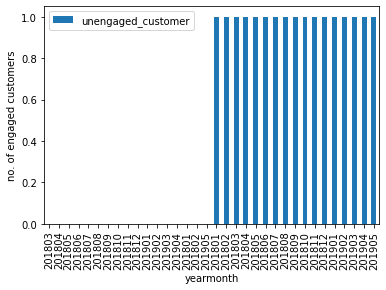

In [ ]:
plotdata = df_all[['yearmonth','unengaged_customer']]
plotdata = plotdata.drop_duplicates()
plotdata = plotdata.set_index('yearmonth')
# Plot a bar chart
plotdata.plot(kind="bar")
plt.xlabel('yearmonth')
plt.ylabel('no. of engaged customers')
plt.show()

In [ ]:
feat_eng_df=feat_eng_df[['user_id','last_transact_date','engaged_days']]
print(feat_eng_df.columns)
df_all=df_all.merge(feat_eng_df, left_on=['user_id'], right_on = ['user_id'], how='left')
print(df_all.isnull().sum())


Index(['user_id', 'last_transact_date', 'engaged_days'], dtype='object')
user_id                                        0
yearmonth                                      0
city                                           0
country                                        0
attributes_notifications_marketing_email       0
                                            ... 
type                                           0
h_type                                         0
unengaged_customer                             0
last_transact_date                          2518
engaged_days                                   0
Length: 111, dtype: int64


***Sub-tasks - Part B - [Modelling Training and Validation using Jupyter Notebook | Python3]***
1. Split the data such that:
  *   Training data - 80% till 201809
  *   Validation data 1 (out-of-sample) - 20% till 201809
  *   Validation data 2 (out-of-time) - 201812
  *   Scoring data - 201901
2. Train, tune and validate a Logistic Regression model
3. Train, tune and validate an XGBoost classification model
4. Based on the 2 models, what are the essential indicators of unengagement?
5. Compare the performance of the 2 models. Which model should ParTech use?
6. What can cumulative gains plot tell us about the optimal sample size for testing?

In [ ]:
print(df_all.dtypes)

user_id                                      object
yearmonth                                     int64
city                                         object
country                                      object
attributes_notifications_marketing_email    float64
                                             ...   
type                                        float64
h_type                                      float64
unengaged_customer                            int64
last_transact_date                           object
engaged_days                                  int64
Length: 111, dtype: object


In [ ]:
eng =  ((df_all['yearmonth']==201809) | (df_all['yearmonth']==201808) | (df_all['yearmonth']==201807) | (df_all['yearmonth']==201806) | (df_all['yearmonth']==201805) | (df_all['yearmonth']==201804) | (df_all['yearmonth']==201803) | (df_all['yearmonth']==201802) | (df_all['yearmonth']==201801))
df1 = df_all[eng]
eng1 = df_all['yearmonth']==201812
df2 = df_all[eng1]
eng2 = df_all['yearmonth']==201901
df3 = df_all[eng2]
X1=df1[['yearmonth','attributes_notifications_marketing_email','attributes_notifications_marketing_push','num_contacts','amount_usd','direction_outbound','direction_inbound','transactions_state_completed','transactions_state_reverted','transactions_state_declined','transactions_state_pending','transactions_state_failed','transactions_state_cancelled','transactions_type_transfer','transactions_type_card_payment','transactions_type_exchange','transactions_type_atm','transactions_type_topup','transactions_type_card_refund','transactions_type_refund','transactions_type_fee','transactions_type_cashback','transactions_type_tax','tx_count','engaged_days']]
y1=df1['unengaged_customer']
X_test2=df2[['yearmonth','attributes_notifications_marketing_email','attributes_notifications_marketing_push','num_contacts','amount_usd','direction_outbound','direction_inbound','transactions_state_completed','transactions_state_reverted','transactions_state_declined','transactions_state_pending','transactions_state_failed','transactions_state_cancelled','transactions_type_transfer','transactions_type_card_payment','transactions_type_exchange','transactions_type_atm','transactions_type_topup','transactions_type_card_refund','transactions_type_refund','transactions_type_fee','transactions_type_cashback','transactions_type_tax','tx_count','engaged_days']]
y_test2=df2['unengaged_customer']
X_score3=df3[['yearmonth','attributes_notifications_marketing_email','attributes_notifications_marketing_push','num_contacts','amount_usd','direction_outbound','direction_inbound','transactions_state_completed','transactions_state_reverted','transactions_state_declined','transactions_state_pending','transactions_state_failed','transactions_state_cancelled','transactions_type_transfer','transactions_type_card_payment','transactions_type_exchange','transactions_type_atm','transactions_type_topup','transactions_type_card_refund','transactions_type_refund','transactions_type_fee','transactions_type_cashback','transactions_type_tax','tx_count','engaged_days']]
y_score3=df3['unengaged_customer']
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.20,random_state=5) 

In [ ]:
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
final_lr = LogisticRegression(C=5)
final_lr.fit(X_train,y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = final_lr.predict(X_train)
print(y_predict)
final_lr_predict = final_lr.predict(X_test)
print(final_lr_predict)
lr_accuracy = metrics.accuracy_score(final_lr_predict, y_test)
print ("Logistic Regression > Accuracy (validation1 data): ", lr_accuracy)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Logistic Regression > Accuracy (validation1 data):  0.5367898534409743


In [ ]:
print(df2['unengaged_customer'])
df2['unengaged_customer']=df2.unengaged_customer.map({1:'yes', 0:'no'})
print(df2['unengaged_customer'])
print(classification_report(y_test, final_lr_predict, target_names=df2['unengaged_customer'].unique()))
print(classification_report(y_train, y_predict, target_names=df2['unengaged_customer'].unique()))

126        0
127        0
128        0
129        0
130        0
          ..
1336687    1
1336688    1
1336689    1
1336690    1
1336691    1
Name: unengaged_customer, Length: 116205, dtype: int64
126         no
127         no
128         no
129         no
130         no
          ... 
1336687    yes
1336688    yes
1336689    yes
1336690    yes
1336691    yes
Name: unengaged_customer, Length: 116205, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.54      1.00      0.70     50068
         yes       0.00      0.00      0.00     43205

    accuracy                           0.54     93273
   macro avg       0.27      0.50      0.35     93273
weighted avg       0.29      0.54      0.37     93273

              precision    recall  f1-score   support

          no       0.54      1.00      0.70    199910
         yes       0.00      0.00      0.00    173182

    accuracy                           0.54    373092
   macro avg       0.27      0.50      0.35    373092
weighted avg       0.29      0.54      0.37    373092



In [ ]:
final_lr_predict2 = final_lr.predict(X_test2)
print(final_lr_predict2)
lr_accuracy2 = metrics.accuracy_score(final_lr_predict2, y_test2)
print ("Logistic Regression > Accuracy (validation2 data): ", lr_accuracy2)

[0 0 0 ... 0 0 0]
Logistic Regression > Accuracy (validation2 data):  0.3473430575276451


In [ ]:
print(classification_report(y_test2, final_lr_predict2,target_names=df2['unengaged_customer'].unique()))
print(classification_report(y_train, y_predict,target_names=df2['unengaged_customer'].unique()))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.35      1.00      0.52     40363
         yes       0.00      0.00      0.00     75842

    accuracy                           0.35    116205
   macro avg       0.17      0.50      0.26    116205
weighted avg       0.12      0.35      0.18    116205

              precision    recall  f1-score   support

          no       0.54      1.00      0.70    199910
         yes       0.00      0.00      0.00    173182

    accuracy                           0.54    373092
   macro avg       0.27      0.50      0.35    373092
weighted avg       0.29      0.54      0.37    373092



In [ ]:
final_lr_predict3 = final_lr.predict(X_score3)
print(final_lr_predict3)
lr_accuracy3 = metrics.accuracy_score(final_lr_predict3, y_score3)
print ("Logistic Regression > Accuracy (score data): ", lr_accuracy3)

[0 0 0 ... 0 0 0]
Logistic Regression > Accuracy (score data):  0.3541296848310279


In [ ]:
print(classification_report(y_score3, final_lr_predict3,target_names=df2['unengaged_customer'].unique()))
print(classification_report(y_train, y_predict,target_names=df2['unengaged_customer'].unique()))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.35      1.00      0.52     42293
         yes       0.00      0.00      0.00     77135

    accuracy                           0.35    119428
   macro avg       0.18      0.50      0.26    119428
weighted avg       0.13      0.35      0.19    119428

              precision    recall  f1-score   support

          no       0.54      1.00      0.70    199910
         yes       0.00      0.00      0.00    173182

    accuracy                           0.54    373092
   macro avg       0.27      0.50      0.35    373092
weighted avg       0.29      0.54      0.37    373092



In [ ]:
xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=4, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=1, subsample=0.8, verbosity=1)

In [ ]:
y_predict_boost = xgb_model.predict(X_train)
print(y_predict_boost)

xgb_predict = xgb_model.predict(X_test)
print(len(xgb_predict))
print(len(y_test))
xgb_accuracy = metrics.accuracy_score(xgb_predict, y_test)
print ("XGBoost > Accuracy (validation1 data): ", xgb_accuracy)

[0 1 1 ... 0 0 1]
93273
93273
XGBoost > Accuracy (validation1 data):  0.9911121117579578


In [ ]:
print(classification_report(y_test, xgb_predict,target_names=df2['unengaged_customer'].unique()))
print(classification_report(y_train, y_predict_boost,target_names=df2['unengaged_customer'].unique()))

              precision    recall  f1-score   support

          no       0.99      0.99      0.99     50068
         yes       0.99      0.99      0.99     43205

    accuracy                           0.99     93273
   macro avg       0.99      0.99      0.99     93273
weighted avg       0.99      0.99      0.99     93273

              precision    recall  f1-score   support

          no       0.99      0.99      0.99    199910
         yes       0.99      0.99      0.99    173182

    accuracy                           0.99    373092
   macro avg       0.99      0.99      0.99    373092
weighted avg       0.99      0.99      0.99    373092



In [ ]:
xgb_predict2 = xgb_model.predict(X_test2)
print(len(xgb_predict2))
print(len(y_test2))
xgb_accuracy2 = metrics.accuracy_score(xgb_predict2, y_test2)
print ("XGBoost > Accuracy (validation2 data): ", xgb_accuracy2)

116205
116205
XGBoost > Accuracy (validation2 data):  0.8904608235445979


In [ ]:
print(classification_report(y_test2, xgb_predict2,target_names=df2['unengaged_customer'].unique()))
print(classification_report(y_train, y_predict_boost,target_names=df2['unengaged_customer'].unique()))

              precision    recall  f1-score   support

          no       0.82      0.87      0.85     40363
         yes       0.93      0.90      0.91     75842

    accuracy                           0.89    116205
   macro avg       0.88      0.89      0.88    116205
weighted avg       0.89      0.89      0.89    116205

              precision    recall  f1-score   support

          no       0.99      0.99      0.99    199910
         yes       0.99      0.99      0.99    173182

    accuracy                           0.99    373092
   macro avg       0.99      0.99      0.99    373092
weighted avg       0.99      0.99      0.99    373092



In [ ]:
xgb_predict3 = xgb_model.predict(X_score3)
print(len(xgb_predict3))
print(len(y_score3))
xgb_accuracy3 = metrics.accuracy_score(xgb_predict3, y_score3)
print ("XGBoost > Accuracy (score data): ", xgb_accuracy3)

119428
119428
XGBoost > Accuracy (score data):  0.8793666476873095


In [ ]:
print(classification_report(y_score3, xgb_predict3,target_names=df2['unengaged_customer'].unique()))
print(classification_report(y_train, y_predict_boost,target_names=df2['unengaged_customer'].unique()))

              precision    recall  f1-score   support

          no       0.81      0.86      0.83     42293
         yes       0.92      0.89      0.90     77135

    accuracy                           0.88    119428
   macro avg       0.87      0.88      0.87    119428
weighted avg       0.88      0.88      0.88    119428

              precision    recall  f1-score   support

          no       0.99      0.99      0.99    199910
         yes       0.99      0.99      0.99    173182

    accuracy                           0.99    373092
   macro avg       0.99      0.99      0.99    373092
weighted avg       0.99      0.99      0.99    373092



In [ ]:
print(classification_report(y_score3, final_lr_predict3,target_names=df2['unengaged_customer'].unique()))
print(classification_report(y_score3, xgb_predict3,target_names=df2['unengaged_customer'].unique()))

              precision    recall  f1-score   support

          no       0.35      1.00      0.52     42293
         yes       0.00      0.00      0.00     77135

    accuracy                           0.35    119428
   macro avg       0.18      0.50      0.26    119428
weighted avg       0.13      0.35      0.19    119428



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.81      0.86      0.83     42293
         yes       0.92      0.89      0.90     77135

    accuracy                           0.88    119428
   macro avg       0.87      0.88      0.87    119428
weighted avg       0.88      0.88      0.88    119428



According to accuracy metrics, XGBoost is the model ParTech should use as it gives 88% accuracy compared to Logistic Regression model as it gives 35% accuracy.

<Figure size 504x504 with 0 Axes>

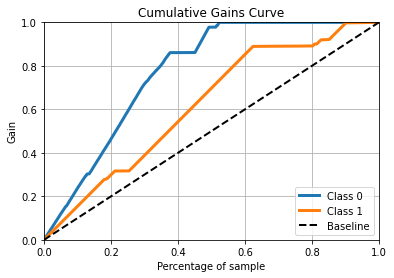

In [ ]:
DF_xgb = pd.DataFrame(xgb_predict3, columns=['xgb_predict3']) 
DF_xgb=DF_xgb.replace(to_replace ='no', value =0)  
DF_xgb=DF_xgb.replace(to_replace ='yes', value =1) 
DF_xgb['xgb_predict3']=DF_xgb['xgb_predict3'].astype(int)
xgb_predict3=DF_xgb['xgb_predict3']
xgb_pred=np.vstack((1-xgb_predict3, xgb_predict3)).T
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_score3, xgb_pred)
plt.show()

According to it, if we approach 20% of our customer base (x-axis), we will get almost 30% of all the unengaged customers (y-axis). Remember: the probabilities are sorted from larger to smaller. This means that the 20% rate of the x-axis corresponds to the 20% highest probabilities, as predicted by our model. With the top 60% of our customer base we can find a whooping percentage of 90% of all unengaged customers and so on so forth!

In [ ]:
df_all.to_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/complete_dataset.csv')
df3.to_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/task3_dataset.csv')